In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("/Users/andrew/Documents/processing of bilogical data analysis/Assignments/Assignment_2_supplement/periodic_gene_expression.tsv", sep="\t", index_col=0)

print(data)



      0.132541748514212  0.22764074056482023  0.14828200919760418  \
0                                                                   
1              0.215197             0.378163             0.400179   
2              0.122402             0.247476             0.231400   
3              0.135091             0.249432             0.198000   
4              0.163189             0.210381             0.223441   
5              0.112949             0.113134             0.190980   
...                 ...                  ...                  ...   
8808           0.005437             0.174216             0.105056   
8809           0.425532             0.867009             0.767083   
8810           0.095460             0.198411             0.166682   
8811           0.362681             0.438757             0.520215   
8812           0.392305             0.568795             0.609745   

      0.0554196263670002  0.1734260578698282  0.21282449873561188  \
0                                

In [24]:
ids=data.loc[[766, 932, 3297 ,4685]]
ids

,0.132541748514212,0.22764074056482023,0.14828200919760418,0.0554196263670002,0.1734260578698282,0.21282449873561188,0.2959316374566157,0.10648439408557102,0.0532648666532511,0.09581446272390506,...,0.5448712426120207,0.6209457850670713,0.155173850989368,0.45114115763541357,0.4161490353680438,0.150082533835292,0.3123944639615827,0.4501608697992175,0.5623950879002614,0.2981183056877373
0,,,,,,,,,,,,,,,,,,,,,
766,-0.272883,-0.140205,-0.112855,-0.388505,-0.201556,-0.001225,-0.037736,-0.294257,-0.501961,-0.382025,...,-0.273774,-0.322380,-0.108722,0.148993,0.087118,-0.082236,0.363583,1.145592,0.932463,0.323802
932,-0.724946,-0.604492,-0.652383,-0.616464,-0.430064,-0.274524,-0.283492,-0.529071,-0.451153,0.010609,...,0.166527,0.124548,-0.461762,-0.062331,-0.210005,-0.476288,-0.113912,0.124076,0.312016,-0.262701
3297,-0.688987,-0.615514,-0.604689,-0.612808,-0.409191,-0.252765,-0.185222,-0.401658,-0.274221,0.047051,...,-0.073402,-0.058916,-0.426925,-0.206208,-0.205800,-0.476990,-0.221712,0.092722,0.141186,-0.211536
4685,-0.099380,0.118599,0.111801,-0.089971,0.054377,0.410261,0.229808,0.053897,-0.224906,0.017369,...,-0.143339,-0.186120,-0.264604,-0.193765,-0.215941,-0.269646,-0.205946,-0.045005,-0.219446,-0.239025


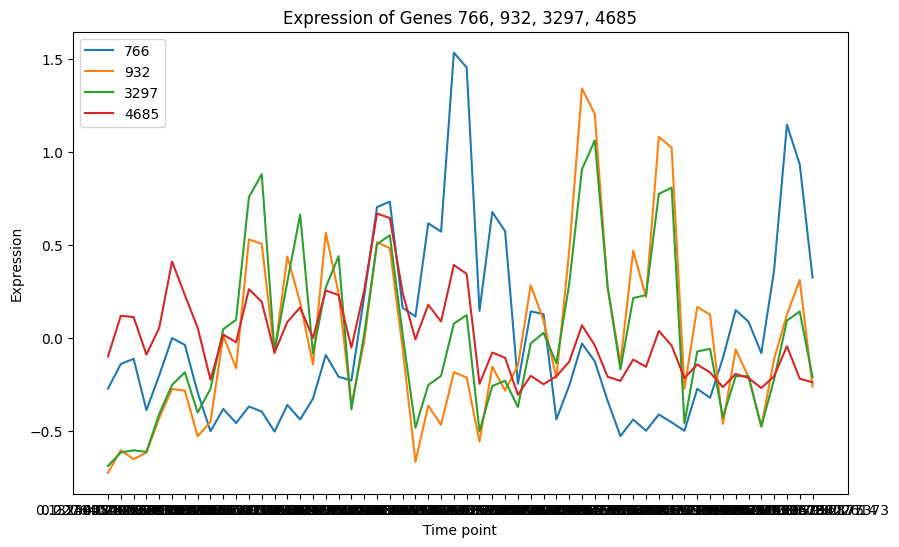

In [26]:

selected_T = ids.T  # time points on x-axis

plt.figure(figsize=(10,6))
for row in ids.index:
    plt.plot(selected_T.index, selected_T[row], label=row)

plt.legend()
plt.xlabel("Time point")
plt.ylabel("Expression")
plt.title("Expression of Genes 766, 932, 3297, 4685")
plt.show()


In [27]:
def water_shed(expr, max_distance):
    n = len(expr)
    labels = [-1] * n
    next_label = 0


    order = sorted(range(n), key=lambda i: abs(expr[i]), reverse=True)
    for i in order:
        found_peak = None
        for j in range(max(0, i - max_distance), min(n, i + max_distance + 1)):
            if labels[j] != -1:
                found_peak = labels[j]
                break

        if found_peak is not None:
            labels[i] = found_peak
        else:
            labels[i] = next_label
            next_label += 1

    peaks = {}
    for idx, lab in enumerate(labels):
        if lab not in peaks or abs(expr[idx]) > abs(expr[peaks[lab]]):
            peaks[lab] = idx

    return labels, peaks


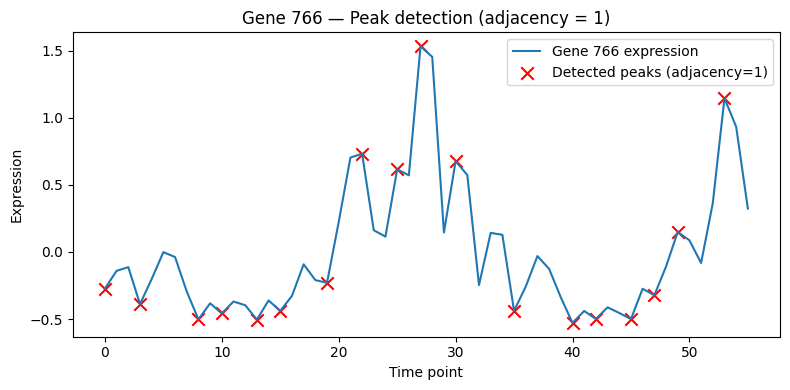

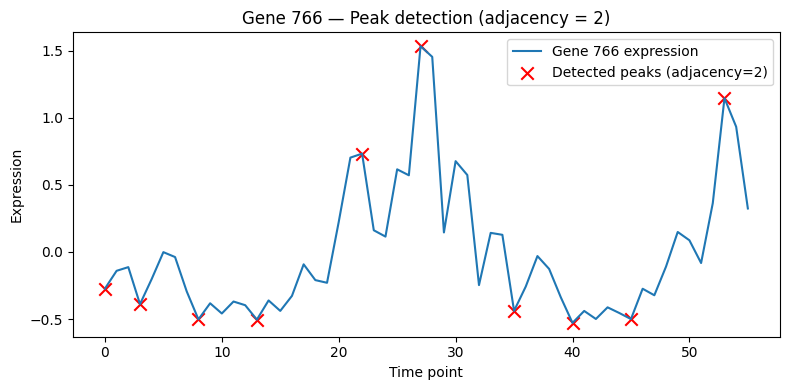

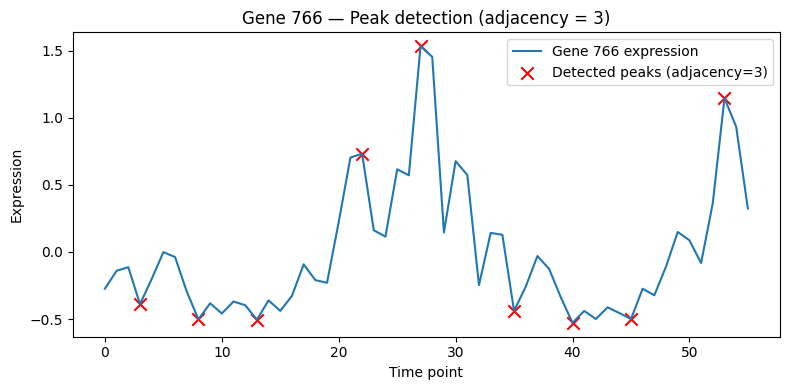

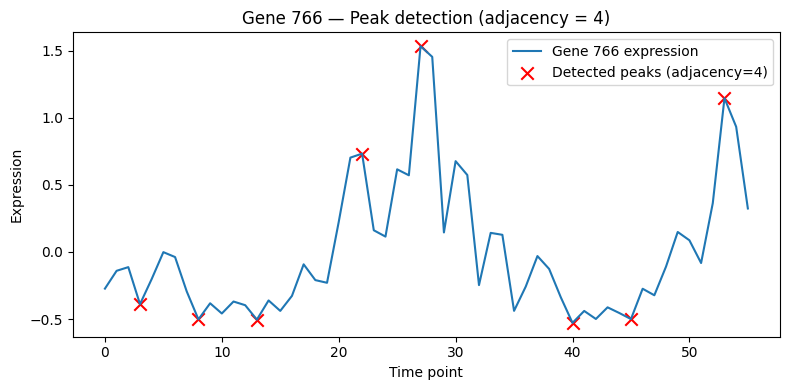

In [29]:
gene_row = 766
expr_766 = data.loc[gene_row].astype(float).tolist()
time = list(range(len(expr_766)))

for dist in [1, 2, 3, 4]:
    labels, peaks = water_shed(expr_766, dist)

    peak_positions = sorted(peaks.values())
    peak_values = [expr_766[i] for i in peak_positions]

    plt.figure(figsize=(8,4))
    plt.plot(time, expr_766, label="Gene 766 expression")
    plt.scatter(peak_positions, peak_values, color="red", s=80, marker="x",
                label=f"Detected peaks (adjacency={dist})")

    plt.title(f"Gene 766_Peak detection (adjacency = {dist})")
    plt.xlabel("Time point")
    plt.ylabel("Expression")
    plt.legend()
    plt.tight_layout()
    plt.show()

__2.2__ (c) :
when i apply water_shed function for peak detection for gene 766 with 4 different adjacencies i found out that there is a differencies in the number of peaks detected
in adjacency =1 : there are many dips detected as peaks and many false peaks detected because it's sensitive
in adjacency =2,3 : i see fewer peaks than adjacency 1 and the noise is filtered so there is a balance between sensitivty and smoothness
in adjacency =4
the well suited are adjacencies 2,3 it gives meanigful peaks with less noise

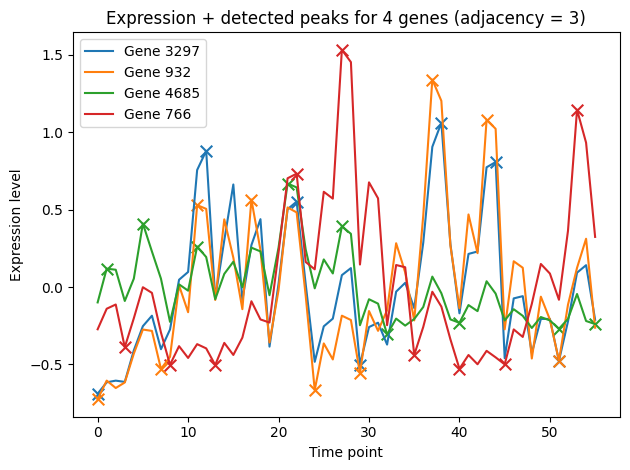

In [36]:
genes = {766, 932, 3297, 4685}

adjacency = 3

for gene_id in genes:


    expr = data.loc[gene_id].astype(float).tolist()
    time = list(range(len(expr)))

    labels, peaks = water_shed(expr, adjacency)

    peak_positions = sorted(peaks.values())
    peak_values = [expr[i] for i in peak_positions]

    # plot expression
    plt.plot(time, expr, label=f"Gene {gene_id}")

    # plot peaks
    plt.scatter(peak_positions, peak_values, marker="x", s=70)

plt.xlabel("Time point")
plt.ylabel("Expression level")
plt.title(f"Expression + detected peaks for 4 genes (adjacency = {adjacency})")
plt.legend()
plt.tight_layout()
plt.show()

__d__)
by comparing thid graph and fig(2) i found out that it somehow resemble the figure as genes (3297,932,4685) have shared peaks and dips and gene 766 have different patterns as there is a dip while there are peaks so the genes clearly show periodic expression
- the timing of the peaks indicates the distinct functions of these genes in the cell-cycle program: some genes peak early (probably G1/S), others later (S/G2 or M), and collectively they constitute a coordinated sequence of expression events required for appropriate cell-cycle development.